# MILESTONE 1

### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset into dataframe and check it out

In [277]:
df = pd.read_csv('friends_info.csv')

#View shape and first few rows
print("The dimension of the table is: ", df.shape) 
df.head()

The dimension of the table is:  (229, 10)


,Date,Episode,Title,Directed by,Written by,Duration,Summary,Rating/Share,U.S. viewers,Prod.\ncode
0,09/22/94,01-01,The Pilot,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,456650
1,09/29/94,01-02,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,456652
2,10/06/94,01-03,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,22.0,Monica becomes irritated when everyone likes h...,13.6/22,19.5 million,456651
3,10/13/94,01-04,The One with George Stephanopoulos,James Burrows,Alexa Junge,22.0,Joey and Chandler take Ross to a hockey game t...,13.7/22,19.7 million,456654
4,10/20/94,01-05,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,22.0,"Eager to spend time with Rachel, Ross pretends...",12.9/20,18.6 million,456653


### Update columns

In [278]:
# Rename column to "Prod Code" and "Written by" and check the results:
df = df.rename(columns = {'Prod.\ncode': 'Prod_Code'})
df = df.rename(columns = {'Written by': 'Written_by'})

# Create individual Rating and Share columns from Rating/Share:
df['Rating'] = df['Rating/Share'].str.split('/').str[0]
df['Share'] = df['Rating/Share'].str.split('/').str[-1]

# Create a new column with just the number of millions of US Viewers (no "million"):
df['US Viewers (Millions)'] = df['U.S. viewers'].str.split(' ').str[0]

# Create new columns to split the Episode column into the Season number and the Episode number:
df['Season Number'] = df['Episode'].str.split('-').str[0]
df['Episode Number'] = df['Episode'].str.split('-').str[-1]

df.head(2)

,Date,Episode,Title,Directed by,Written_by,Duration,Summary,Rating/Share,U.S. viewers,Prod_Code,Rating,Share,US Viewers (Millions),Season Number,Episode Number
0,09/22/94,01-01,The Pilot,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,456650,14.7,23,21.5,01,01
1,09/29/94,01-02,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,456652,14.0,22,20.2,01,02


### Convert new columns to numeric types:

In [279]:
df['Rating'] = df['Rating'].astype(float)
df['Share'] = df['Share'].astype(float)
df['US Viewers (Millions)'] = df['US Viewers (Millions)'].astype(float)
print(df.dtypes)

Date                      object
Episode                   object
Title                     object
Directed by               object
Written_by                object
Duration                 float64
Summary                   object
Rating/Share              object
U.S. viewers              object
Prod_Code                 object
Rating                   float64
Share                    float64
US Viewers (Millions)    float64
Season Number             object
Episode Number            object
dtype: object


### Viewing the basic descriptive statistics for the numeric columns:

In [280]:
print(df.describe()) 

         Duration      Rating       Share  US Viewers (Millions)
count  227.000000  229.000000  229.000000             229.000000
mean    23.224670   16.420087   26.366812              25.074192
std      5.915908    2.707339    4.025787               4.616193
min     22.000000    9.600000   17.000000              15.650000
25%     22.000000   14.700000   24.000000              22.290000
50%     22.000000   16.100000   26.000000              24.400000
75%     22.000000   17.900000   29.000000              27.510000
max     60.000000   29.800000   46.000000              52.900000


###### We see here that the Duration column is missing data in two rows (227 vs 229). We will explore options for this in the next Milestone. 

###### The average Rating is 16.42, while the average Share is 26.37. That ~10% difference is due to homes having TVs but not using them at all vs having a TV and using it to watch something else.

### Plot 1: Share and rating of each episode on the same line graph to see correlating trends:

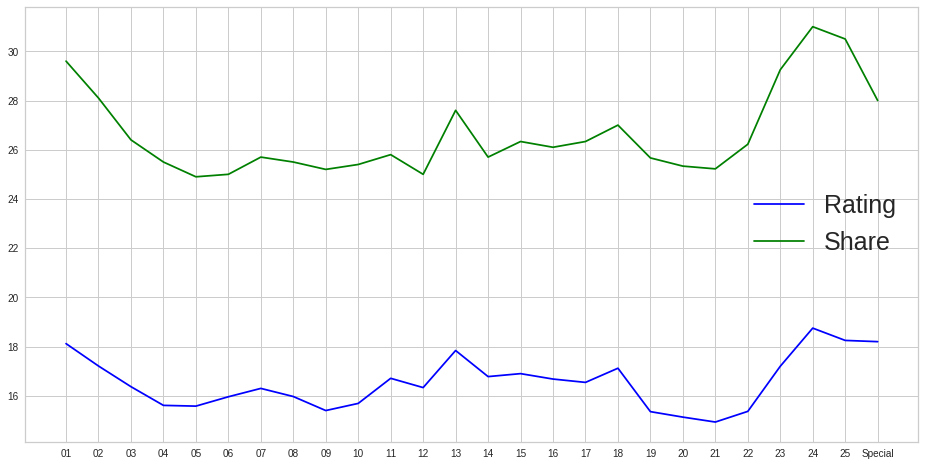

In [281]:
Episode = df.groupby('Episode Number', as_index = False).mean()['Episode Number']
Rating = df.groupby('Episode Number', as_index = False).mean()['Rating']
Share = df.groupby('Episode Number', as_index = False).mean()['Share']

plt.rcParams['figure.figsize'] = (16, 8) 
fig = plt.figure()
ax = fig.add_axes

# plot lines
plt.plot(Episode, Rating, label = "Rating", color = 'blue')
plt.plot(Episode, Share, label = "Share", color = 'green')
plt.legend(fontsize = 25)
plt.show()



###### We see that the share and rating trended closely together, but not exactly. For example - the average share for the Special episodes had a large downturn, while the rating remained relatively flat

### Plot 2: Ratings by the duration of the episode:

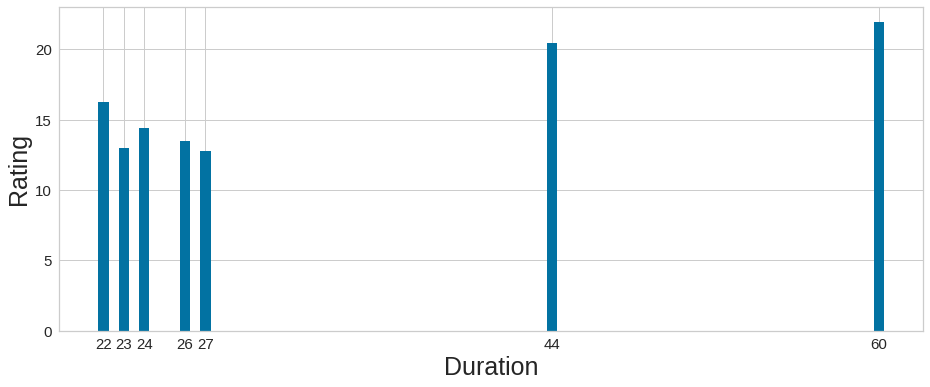

In [282]:
Duration_grouped = df.groupby('Duration', as_index = False).mean()['Duration'].values
Rating = df.groupby('Duration', as_index = False).mean()['Rating']

plt.rcParams['figure.figsize'] = (12, 4.5) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# plot lines
ax.bar(Duration_grouped, Rating, width = .5, color = 'b')
ax.set_ylabel('Rating', fontsize = 25)
ax.set_xlabel('Duration', fontsize = 25)
plt.xticks(Duration_grouped)
ax.tick_params(axis='both', labelsize=15) 

###### We see that the average rating of the longer episodes were higher than shorter episodes. Something to note, is that the finales were typically the episodes with longer durations

### Plot 3: Average duration of the episodes vs the average rating of the episodes:

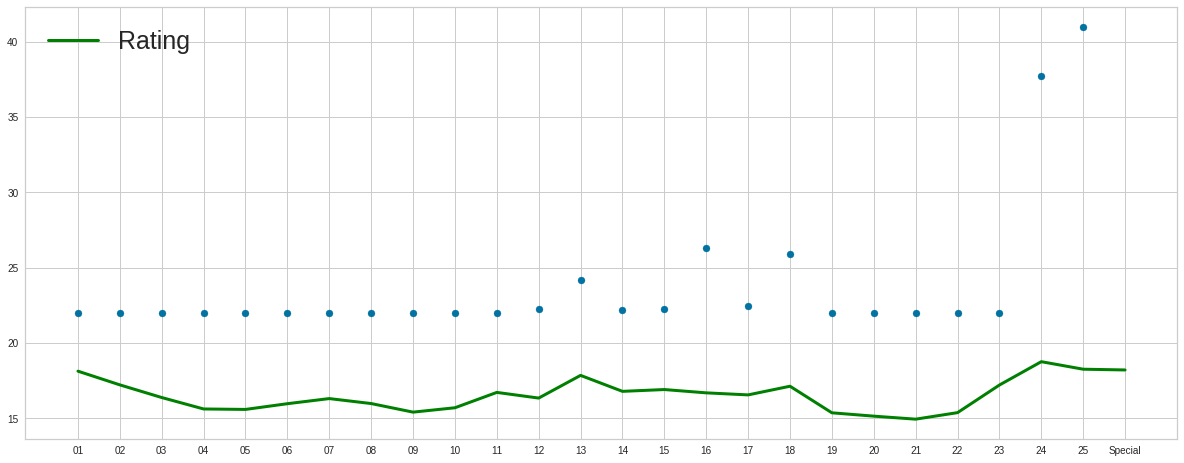

In [283]:
Duration_grouped = df.groupby('Episode Number', as_index = False).mean()['Duration'].values
Episode = df.groupby('Episode Number', as_index = False).max()['Episode Number'].values

plt.rcParams['figure.figsize'] = (16, 6) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.scatter(Episode, Duration_grouped, alpha = 1.0)

Rating = df.groupby('Episode Number', as_index = False).mean()['Rating']
plt.plot(Episode, Rating, label = "Rating", color = 'green', linewidth = 3.0)
plt.legend(fontsize = 25)
plt.show()

###### With the overlaying plots, we see that the later episodes tended to be longer and had higher ratings

### Plot 4: Average rating of episodes based on the director

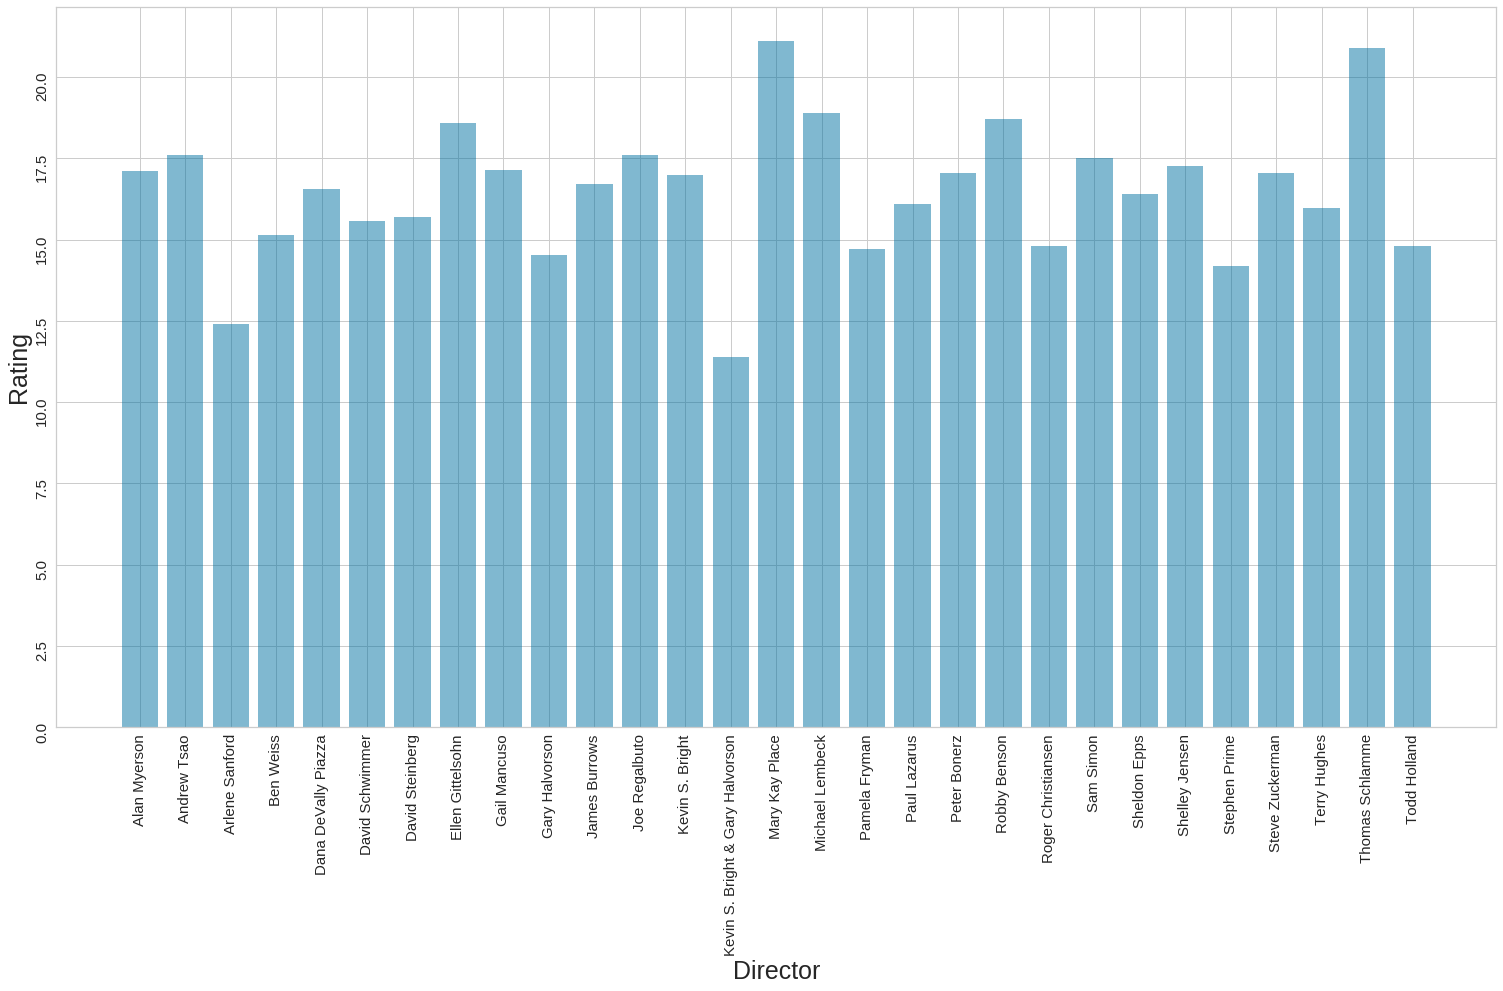

In [284]:
x = df.groupby('Directed by', as_index = False).mean()['Directed by'].values
y = df.groupby('Directed by', as_index = False).mean()['Rating'].values

plt.rcParams['figure.figsize'] = (20, 10) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(x, y, alpha = .5)
ax.set_ylabel('Rating', fontsize = 25)
ax.set_xlabel('Director', fontsize = 25)
ax.tick_params(axis='both', labelsize=15, rotation = 90) 

###### The highest ratings belong to Mary Kay Place and Thomas Schlamme. Further calculations are needed to see how many they directed

# MILESTONE 2

### Performing further cleaning 

#### Creating a list of the column names and checking number of NaN's per column

In [285]:
columns = df.columns
columns = columns.tolist()
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(df[item].isnull().sum()))

Number of NaN's for  Date - 0
Number of NaN's for  Episode - 0
Number of NaN's for  Title - 0
Number of NaN's for  Directed by - 2
Number of NaN's for  Written_by - 2
Number of NaN's for  Duration - 2
Number of NaN's for  Summary - 2
Number of NaN's for  Rating/Share - 0
Number of NaN's for  U.S. viewers - 0
Number of NaN's for  Prod_Code - 2
Number of NaN's for  Rating - 0
Number of NaN's for  Share - 0
Number of NaN's for  US Viewers (Millions) - 0
Number of NaN's for  Season Number - 0
Number of NaN's for  Episode Number - 0


#### Finding the rows where Duration is NaN

In [286]:
cond = pd.isnull(df["Duration"]) 

df[cond]

,Date,Episode,Title,Directed by,Written_by,Duration,Summary,Rating/Share,U.S. viewers,Prod_Code,Rating,Share,US Viewers (Millions),Season Number,Episode Number
156,02/15/01,Special,Friends: The Stuff You've Never Seen,NaN,NaN,NaN,NaN,14.4/21,22.50 million,NaN,14.4,21.0,22.50,Special,Special
227,05/06/04,Special,The One Before the Last One:\nTen Years of Fri...,NaN,NaN,NaN,NaN,22.0/35,36.89 million,NaN,22.0,35.0,36.89,Special,Special


#### These rows are missing multiple values, and since we are not as concerned with individual Special episodes, rather that overarching popularity of the show, so we will remove these rows altogether from the dataset. 

In [287]:
df = df.dropna(inplace = False)
df = df.reset_index(drop=True)

# Rechecking the number of missing values
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(df[item].isnull().sum()))

Number of NaN's for  Date - 0
Number of NaN's for  Episode - 0
Number of NaN's for  Title - 0
Number of NaN's for  Directed by - 0
Number of NaN's for  Written_by - 0
Number of NaN's for  Duration - 0
Number of NaN's for  Summary - 0
Number of NaN's for  Rating/Share - 0
Number of NaN's for  U.S. viewers - 0
Number of NaN's for  Prod_Code - 0
Number of NaN's for  Rating - 0
Number of NaN's for  Share - 0
Number of NaN's for  US Viewers (Millions) - 0
Number of NaN's for  Season Number - 0
Number of NaN's for  Episode Number - 0


### More updates to columns

In [288]:
# Dropping features that will not be used for model building
df = df.drop(['Prod_Code', 'Title'], axis=1)

# Converting columns to float
df['Episode Number'] = df['Episode Number'].astype(float)
df['Season Number'] = df['Season Number'].astype(float)

df.head(2)

,Date,Episode,Directed by,Written_by,Duration,Summary,Rating/Share,U.S. viewers,Rating,Share,US Viewers (Millions),Season Number,Episode Number
0,09/22/94,01-01,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,14.7,23.0,21.5,1.0,1.0
1,09/29/94,01-02,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,14.0,22.0,20.2,1.0,2.0


### Plot 5: All of the episode's ratings and shares

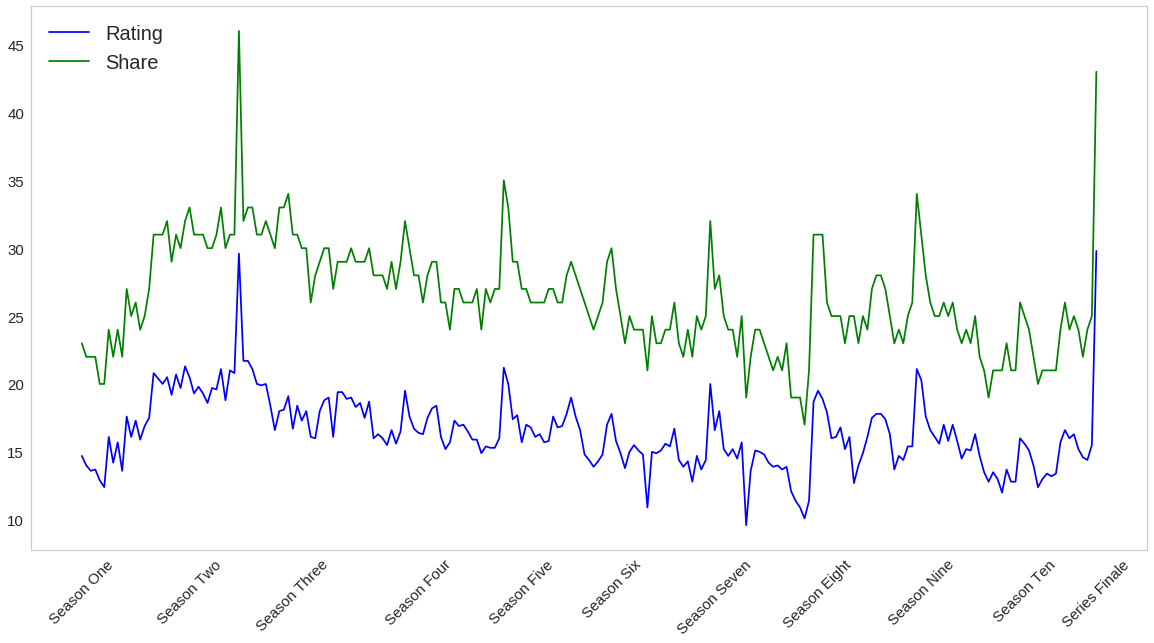

In [289]:
Episode = df.Episode
Rating = df.Rating
Share = df.Share
Premiers = ['01-01', '02-01', '03-01', '04-04', '05-04', '06-01', '07-01', '08-01', '09-01', '10-01', '10-17\n10-18']
Seasons = ['Season One', 'Season Two', 'Season Three', 'Season Four', 'Season Five', 'Season Six', 'Season Seven', 'Season Eight', 'Season Nine', 'Season Ten', "Series Finale"]

plt.rcParams['figure.figsize'] = (20, 10) 
fig = plt.figure()
ax = fig.add_axes

# plot lines
plt.plot(Episode, Rating, label = "Rating", color = 'blue')
plt.plot(Episode, Share, label = "Share", color = 'green')
plt.legend(fontsize = 20)
plt.xticks(Premiers, Seasons, rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis = 'both')
plt.show()


#### Notice the spikes around the season finales, with one large one at the series finale. The most interesting spike, however, is in the middle of season 2 - it's not a finale or premier.

#### Importing additional package

In [290]:
from yellowbrick.features import Rank2D 

#### Creating dataframe from list of features for visualizer and setting param

In [291]:
num_features = ['US Viewers (Millions)', 'Rating', 'Share', 'Duration', 'Episode Number', 'Season Number']

X = df[num_features]

#### Instantiating visualizer with the Pearson Correlation algorithm and setting parameters, fitting, and transforming before showing

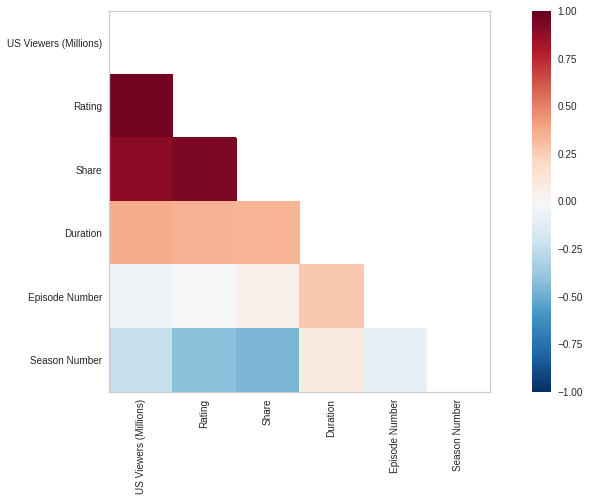

In [292]:
plt.rcParams['figure.figsize'] = (15, 7)

visualizer = Rank2D(features=num_features, algorithm='pearson') 
visualizer.fit(X)                
visualizer.transform(X)         
plt.show() 

#### Now we see that the calculations support what our visualization indicated - Shares, Ratings, and US Viewers are very highly positively correlated with each other, and Duration has a smaller, yet still significant positive correlation with them as well. 

#### What is interesting is that the Season is negatively correlated with almost all of the features except Duration, meaning that as the seasons progressed, the ratings, US Viewers, and shares trended toward decline. 

#### Last observation is that the Episode Number and Rating have virtually no correlation at all. Considering we expected to see season finales nearly always have higher ratings, this is unexpected that the Episode Number would have no bearing on the Rating it received.

#### Showing instances with highest rating and highest share

In [293]:
print (df[df.Rating == df['Rating'].max()])
print (df[df.Share == df['Share'].max()])

         Date       Episode      Directed by                    Written_by  \
226  05/06/04  10-17\n10-18  Kevin S. Bright  Marta Kauffman & David Crane   

     Duration                                            Summary Rating/Share  \
226      60.0  Erica gives birth to the baby that Monica and ...      29.8/43   

      U.S. viewers  Rating  Share  US Viewers (Millions)  Season Number  \
226  52.46 million    29.8   43.0                  52.46           10.0   

     Episode Number  
226            18.0  
        Date       Episode      Directed by  \
35  01/28/96  02-12\n02-13  Michael Lembeck   

                                      Written_by  Duration  \
35  Jeffrey Astrof & Mike SikowitzMichael Borkow      44.0   

                                              Summary Rating/Share  \
35  Ross goes to visit Marcel whilst on a trip to ...      29.6/46   

    U.S. viewers  Rating  Share  US Viewers (Millions)  Season Number  \
35  52.9 million    29.6   46.0                   5

#### Additionally, we can see visually on the plot and even with the Pearson correlation that ratings and shares are very highly correlated, the Episode with the highest rating is not the same as the Episode with the highest share. 

#### Plot 6: Director by Ratings scatter plot with the point size based on number of episodes directed with that rating:

<function matplotlib.pyplot.show(*args, **kw)>

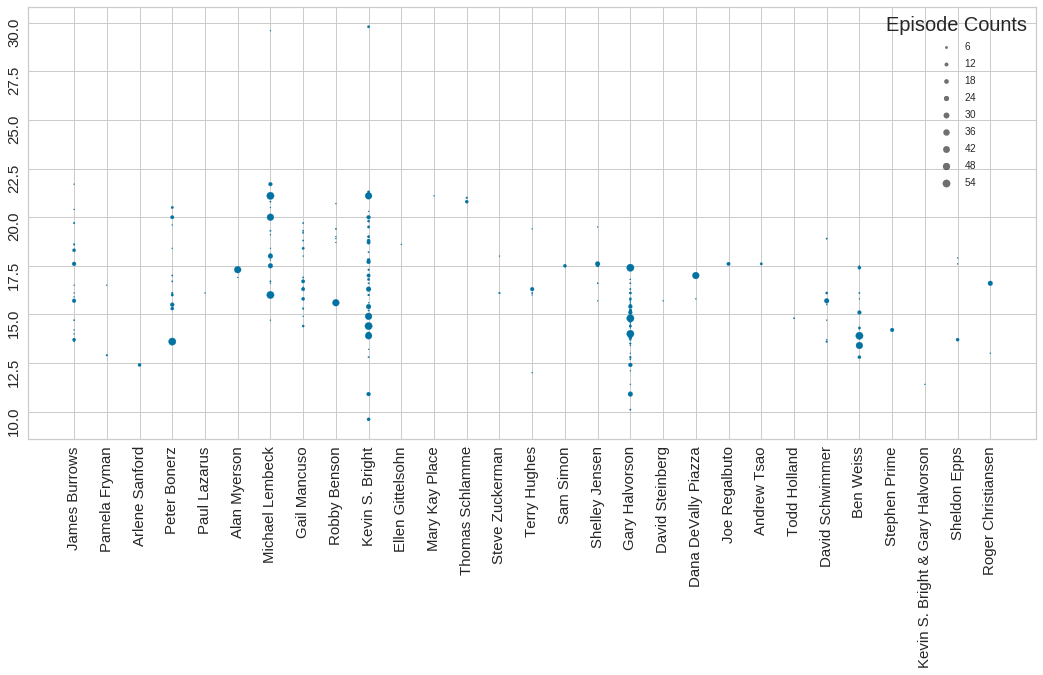

In [294]:
Director = df['Directed by']
Rating = df['Rating']
Episode_Count = df.groupby('Directed by', as_index = False).count()['Episode']

plt.rcParams['figure.figsize'] = (14, 6) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

scatter = plt.scatter(Director, Rating, s = Episode_Count, alpha = 1.0)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Episode Counts")
ax.tick_params(axis='both', labelsize=15, rotation = 90)
plt.show

#### Plot 7: Episodes by Directors, with the point size based on the rating:

<function matplotlib.pyplot.show(*args, **kw)>

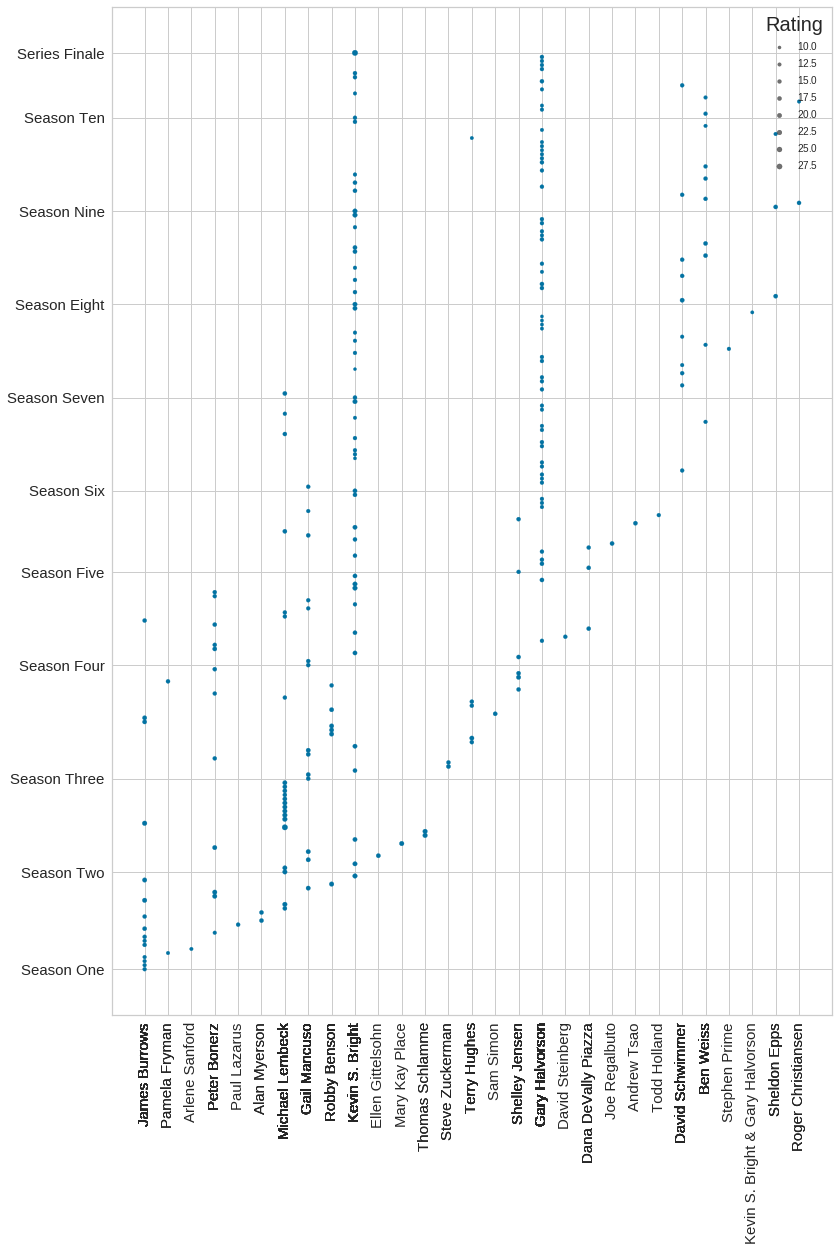

In [295]:
Director = df['Directed by']
Rating = df['Rating']
Episode = df['Episode']
Episode_Count = df.groupby('Directed by', as_index = False).count()['Episode']

plt.rcParams['figure.figsize'] = (10, 14) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

scatter = plt.scatter(Director, Episode, s = Rating, alpha = 1.0)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Rating")
plt.xticks(Director, rotation = 90, fontsize = 15)
plt.yticks(Premiers, Seasons, fontsize = 15)
plt.show

#### Create dummy features based on directors and characters listed in summary

In [296]:
data_cat = df['Directed by']
dum = pd.get_dummies(data_cat) 

df['Rachel'] = np.where(df['Summary'].str.contains('Rachel'), '1', '0')
df['Ross'] = np.where(df['Summary'].str.contains('Ross'), '1', '0')
df['Phoebe'] = np.where(df['Summary'].str.contains('Phoebe'), '1', '0')
df['Chandler'] = np.where(df['Summary'].str.contains('Chandler'), '1', '0')
df['Joey'] = np.where(df['Summary'].str.contains('Joey'), '1', '0')
df['Monica'] = np.where(df['Summary'].str.contains('Monica'), '1', '0')

print (dum.head(2))
print (df.head(2))

   Alan Myerson  Andrew Tsao  Arlene Sanford  Ben Weiss  Dana DeVally Piazza  \
0             0            0               0          0                    0   
1             0            0               0          0                    0   

   David Schwimmer  David Steinberg  Ellen Gittelsohn  Gail Mancuso  \
0                0                0                 0             0   
1                0                0                 0             0   

   Gary Halvorson  ...  Robby Benson  Roger Christiansen  Sam Simon  \
0               0  ...             0                   0          0   
1               0  ...             0                   0          0   

   Sheldon Epps  Shelley Jensen  Stephen Prime  Steve Zuckerman  Terry Hughes  \
0             0               0              0                0             0   
1             0               0              0                0             0   

   Thomas Schlamme  Todd Holland  
0                0             0  
1                

#### Defining function to pull individual writer names from the "Written_by" column and create a rough list named "writers_list"

In [297]:
def writer_process(x):
    if x == 'nan': 
        return ['NONE']
    if x.startswith('Story'):
        x = x.split(":")[1].split("\n")[0]
        x = x.split("&")
        if isinstance(x, str):
            return [x.strip()]
        x = [v.strip() for v in x]
        return x
    else:
        x = x.split("&")
        if isinstance(x, str):
            return [x.strip()]
        x = [v.strip() for v in x]
        return x
writers_list = df["Written_by"].astype(str).apply(writer_process)
writers_list = [w for writers in writers_list for w in writers]

#### From "writers_list", remove the remaining names that were not separated out and add them back individually

In [298]:
unclean_list = ['Michael BorkowStory by : Jill Condon',
'Amy Toomin\nTeleplay by : Shana Goldberg-Meehan',
'Andrew ReichGregory S. Malins',
'Scott SilveriAndrew Reich',
'Gregory S. MalinsMarta Kauffman',
'Scott SilveriMarta Kauffman',
'Scott SilveriMarta Kauffman',
'Mike SikowitzMichael Borkow'
]
for unclean in unclean_list:
    writers_list.remove(unclean)

# Adding the cleaned names
writers_list += [
    'Michael Borkow', 'Jill Condon',
    'Amy Toomin', 'Shana Goldberg-Meehan', 
    'Andrew Reich', 'Gregory S. Malins',
    'Gregory S. Malins', 'Marta Kauffman',
    'Scott Silveri', 'Marta Kauffman',
    'Scott Silveri', 'Marta Kauffman',
    'Mike Sikowitz', 'Michael Borkow'
]

#### Create new dataframe with column names using the individual writers' names and adding binary data to the writers dataframe per episode (1 = One of the writers of the episode)

In [299]:
writers = list(set(writers_list))

# Create dataframe with columns as writers from list
df_writers = pd.DataFrame(columns = writers)

# Add binary variables (dummies)
for writer in writers:
    df_writers[writer] = np.where(df['Written_by'].str.contains(writer), '1', '0')
    
df_writers.head(2)

,Brown Mandell,Scott Silveri,Brian Caldirola,Alexa Junge,Brian Buckner,Vanessa McCarthy,Chris Brown,Amy Toomin,Michael Borkow,Doty Abrams,...,Betsy Borns,R. Lee Fleming Jr.,Pang-Ni Landrum,Earl Davis,Ellen Plummer,Michael Curtis,Sherry Bilsing,Andrew Reich,David Crane,Jeff Greenstein
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Assigning the average Rating to a variable to create a new column with binary values based on if the episode's rating is higher/lower than average 

In [300]:
avg = df.Rating.mean()

# Creating column
df['High/Low'] = np.where(df['Rating'] >= avg, 1, 0)
df.head(2)

,Date,Episode,Directed by,Written_by,Duration,Summary,Rating/Share,U.S. viewers,Rating,Share,US Viewers (Millions),Season Number,Episode Number,Rachel,Ross,Phoebe,Chandler,Joey,Monica,High/Low
0,09/22/94,01-01,James Burrows,David Crane & Marta Kauffman,22.0,"Monica and the gang introduce Rachel to the ""r...",14.7/23,21.5 million,14.7,23.0,21.5,1.0,1.0,1,0,0,0,0,1,0
1,09/29/94,01-02,James Burrows,David Crane & Marta Kauffman,22.0,Ross finds out his ex-wife is pregnant. Rachel...,14.0/22,20.2 million,14.0,22.0,20.2,1.0,2.0,1,1,0,0,0,1,0


#### Assigning model variables of directors dummy variables vs ratings binary

In [301]:
data_model_X = dum
data_model_y = df['High/Low']

#### Importing additional package

In [241]:
from sklearn.model_selection import train_test_split

#### Splitting data into train and test variables

In [242]:
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=30) 

print("No. of samples in training set: ", X_train.shape[0]) 
print('\n') 
print('Number of ratings in the training set:') 
print(y_train.value_counts()) 

print('\n') 

print("No. of samples in validation set:", X_val.shape[0]) 
print('\n') 
print('Number of ratings in the validation set:') 
print(y_val.value_counts())

No. of samples in training set:  158


Number of ratings in the training set:
0    91
1    67
Name: High/Low, dtype: int64


No. of samples in validation set: 69


Number of ratings in the validation set:
0    38
1    31
Name: High/Low, dtype: int64


#### Importing additional packages

In [243]:
from sklearn.linear_model import LogisticRegression 
from yellowbrick.classifier import ConfusionMatrix 
from yellowbrick.classifier import ClassificationReport 
from yellowbrick.classifier import ROCAUC 

#### Instatiating LogisticRegression model

In [244]:
model = LogisticRegression() 

#### Applying the Confusion Matrix and fitting it to the 

0.6231884057971014

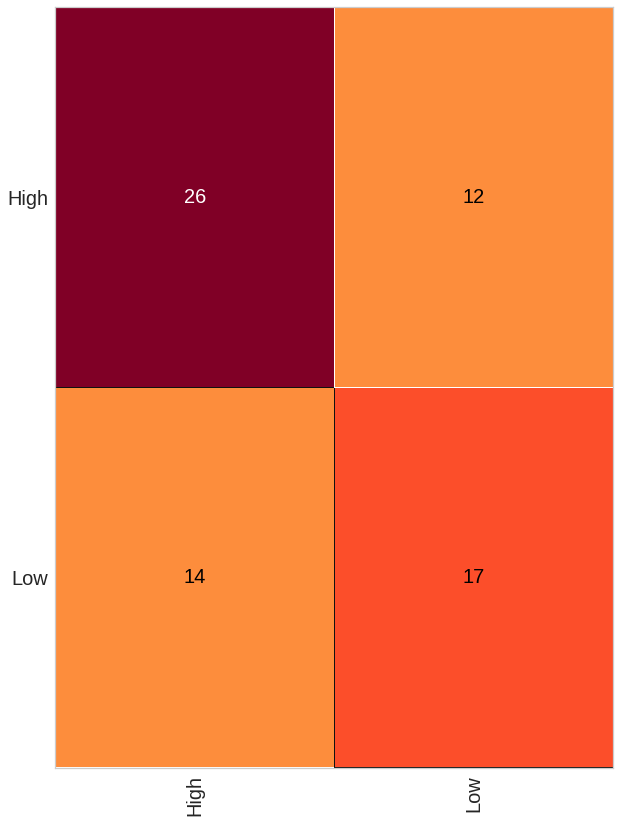

In [245]:
classes = ['High','Low'] 

cm = ConfusionMatrix(model, classes=classes, percent=False) 
cm = cm.fit(X_train, y_train)
cm.score(X_val, y_val) 

#### Setting up parameters for and fitting and calling the visualizer for the Classification Report

0.6231884057971014

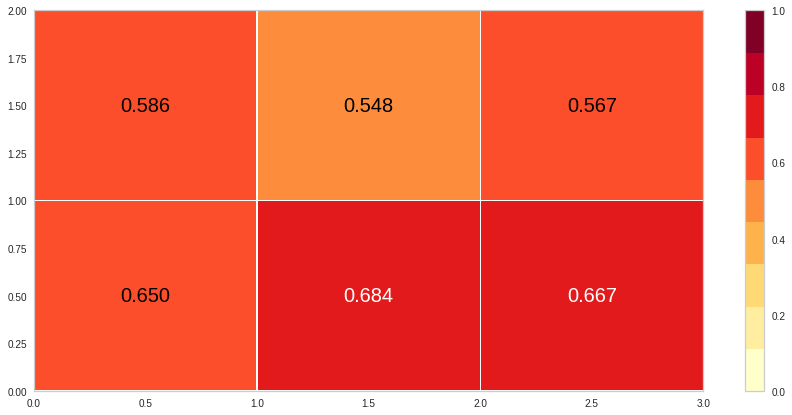

In [246]:
%matplotlib inline 

plt.rcParams['figure.figsize'] = (15, 7) 
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(model, classes=classes) 
visualizer = visualizer.fit(X_train, y_train)  
visualizer.score(X_val, y_val)  

#### Instantiating LogisticRegression and fitting and calling the visualizer to show it

0.6942050567708498

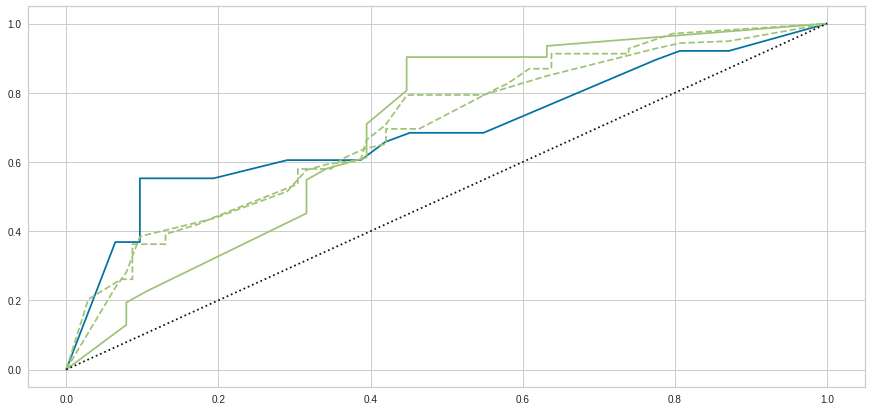

In [247]:
model = LogisticRegression() 
visualizer = ROCAUC(model)

visualizer = visualizer.fit(X_train, y_train) 
visualizer.score(X_val, y_val) 

# Milestone 3

#### Importing additional packages

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### Instantiating and fitting the DecisionTreeClassifier

In [249]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Assigning the prediction for the test variable

In [250]:
y_pred = dt.predict(X_val)

#### Confusion Matrix, Accuracy and Classification Report

#### It's not terribly accurate, with 14 False Positives and 13 False Negatives, and only a 61% accuracy

In [251]:
print (confusion_matrix(y_val, y_pred))

print (accuracy_score(y_val, y_pred))

print(classification_report(y_val, y_pred))

[[24 14]
 [13 18]]
0.6086956521739131
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        38
           1       0.56      0.58      0.57        31

    accuracy                           0.61        69
   macro avg       0.61      0.61      0.61        69
weighted avg       0.61      0.61      0.61        69



## Milestone 4

#### Defining functions to create Decision Trees based on the Gini Index and Entropy

In [252]:
def gini_train(X_train, X_val, y_train):
    clf_gini = DecisionTreeClassifier(
        criterion = "gini", 
        random_state = 30, 
        max_depth = 3)
    
    clf_gini.fit(X_train, y_train)
    return clf_gini

def entropy_train(X_train, X_val, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", 
        random_state = 30, 
        max_depth = 3)
    
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def predicting(X_val, clf_object):
    y_pred = clf_object.predict(X_val)
    print ("Predicted Values")
    print(y_pred)
    return y_pred

def calc_accuracy(y_val, y_pred):
    print ("Confusion Matrix: ", 
          confusion_matrix(y_val, y_pred))
    print ("Accuracy: ", 
          accuracy_score(y_val, y_pred)*100)
    print ("Report: ", 
          classification_report(y_val, y_pred))
    

def main():
    clf_gini = gini_train(X_train, X_val, y_train)
    clf_entropy = entropy_train(X_train, X_val, y_train)
    
    print ("Results using the Gini Index: ")
    
    y_pred_gini = predicting(X_val, clf_gini)
    calc_accuracy(y_val, y_pred_gini)
    
    print ("Results using Entropy: ")
    
    y_pred_entropy = predicting(X_val, clf_entropy)
    calc_accuracy(y_val, y_pred_entropy)

#### Calling function

In [253]:
if __name__ == "__main__":
    main()

Results using the Gini Index: 
Predicted Values
[0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1]
Confusion Matrix:  [[14 24]
 [ 3 28]]
Accuracy:  60.86956521739131
Report:                precision    recall  f1-score   support

           0       0.82      0.37      0.51        38
           1       0.54      0.90      0.67        31

    accuracy                           0.61        69
   macro avg       0.68      0.64      0.59        69
weighted avg       0.70      0.61      0.58        69

Results using Entropy: 
Predicted Values
[0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1]
Confusion Matrix:  [[14 24]
 [ 3 28]]
Accuracy:  60.86956521739131
Report:                precision    recall  f1-score   support

           0       0.82      0.37      0.51        38
           1       0.54      0.90      0.

#### The Classification Report shows a similar overall accuracy but the precision for both Gini and Entropy is higher (since they had the same scores). But it's still relatively low, so we'll work on tuning the hyperparameters

#### Defining updated functions to tune hyperparameters

In [254]:
def gini_train_update(X_train, X_val, y_train):
    clf_gini = DecisionTreeClassifier(
        criterion = "gini", 
        max_depth = 7,
        splitter = 'random')
    
    clf_gini.fit(X_train, y_train)
    return clf_gini

def entropy_train_update(X_train, X_val, y_train):
    clf_entropy = DecisionTreeClassifier(
        criterion = "entropy", 
        max_depth = 7, 
        splitter = 'random')
    
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def main_update():
    clf_gini = gini_train_update(X_train, X_val, y_train)
    clf_entropy = entropy_train_update(X_train, X_val, y_train)
    
    print ("Results using the updated Gini Index option: ")
    
    y_pred_gini = predicting(X_val, clf_gini)
    calc_accuracy(y_val, y_pred_gini)
    
    print ("Results using updated Entropy option: ")
    
    y_pred_entropy = predicting(X_val, clf_entropy)
    calc_accuracy(y_val, y_pred_entropy)

#### Calling function

In [255]:
if __name__ == "__main__":
    main_update()

Results using the updated Gini Index option: 
Predicted Values
[0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1]
Confusion Matrix:  [[21 17]
 [ 3 28]]
Accuracy:  71.01449275362319
Report:                precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.62      0.90      0.74        31

    accuracy                           0.71        69
   macro avg       0.75      0.73      0.71        69
weighted avg       0.76      0.71      0.70        69

Results using updated Entropy option: 
Predicted Values
[0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1]
Confusion Matrix:  [[21 17]
 [ 3 28]]
Accuracy:  71.01449275362319
Report:                precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           

#### We see that tuning the hyperparameters has helped - the overall accuracy has increased 10%!

## Milestone 5

#### In one last model, let's include the writers and characters in the training and predictions

In [256]:
# Assigning features - directors, writers and characters vs binary ratings
features_model = ['Ross', 'Rachel', 'Monica', 'Chandler', 'Phoebe', 'Joey' ]
data_model_X = pd.concat([dum, df_writers, df[features_model]], axis = 1)
data_model_y = df['High/Low']

#### Splitting the data into training and valuation variables

In [257]:
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=30) 

print("No. of samples in training set: ", X_train.shape[0]) 
print('\n') 
print('Number of ratings in the training set:') 
print(y_train.value_counts()) 

print('\n') 

print("No. of samples in validation set:", X_val.shape[0]) 
print('\n') 
print('Number of ratings in the validation set:') 
print(y_val.value_counts())

No. of samples in training set:  158


Number of ratings in the training set:
0    91
1    67
Name: High/Low, dtype: int64


No. of samples in validation set: 69


Number of ratings in the validation set:
0    38
1    31
Name: High/Low, dtype: int64


#### Instantiating and fitting the DecisionTreeClassifier

In [258]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Assigning the prediction for the test variable

In [259]:
y_pred = dt.predict(X_val)

#### Confusion Matrix, Accuracy and Classification Report

#### It's not very accurate, with 15 False Positives and 15 False Negatives, and only a 56% accuracy. The additional variables have not helped to increase accuracy, but this is not altogether surprising

In [260]:
print (confusion_matrix(y_val, y_pred))

print (accuracy_score(y_val, y_pred))

print(classification_report(y_val, y_pred))

[[23 15]
 [15 16]]
0.5652173913043478
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        38
           1       0.52      0.52      0.52        31

    accuracy                           0.57        69
   macro avg       0.56      0.56      0.56        69
weighted avg       0.57      0.57      0.57        69



#### Calling the updated class

In [261]:
if __name__ == "__main__":
    main_update()

Results using the updated Gini Index option: 
Predicted Values
[0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1]
Confusion Matrix:  [[21 17]
 [10 21]]
Accuracy:  60.86956521739131
Report:                precision    recall  f1-score   support

           0       0.68      0.55      0.61        38
           1       0.55      0.68      0.61        31

    accuracy                           0.61        69
   macro avg       0.62      0.62      0.61        69
weighted avg       0.62      0.61      0.61        69

Results using updated Entropy option: 
Predicted Values
[0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1]
Confusion Matrix:  [[18 20]
 [ 8 23]]
Accuracy:  59.42028985507246
Report:                precision    recall  f1-score   support

           0       0.69      0.47      0.56        38
           

#### Let's look at some of the predictions it made

In [262]:
# Convert predictions array to dataframe
y_pred_df = pd.DataFrame(y_pred)

In [263]:
# Reset the index of the input variables (was originally the episode number)
reindex_X = X_val.reset_index()

# Concat the input and output variables into one dataframe
total = pd.concat([reindex_X, y_pred_df], axis = 1)

# Pull rows that were predicted to have a higher than average rating
High_predict = total[total[0] == 1]

In [276]:
# Copy dataframe to remove the old index column
High_sum = High_predict.copy()
High_sum = High_sum.drop(columns=['index'])

#### We're seeing the variables that were part of the most episodes with predicted higher than average ratings. 

#### Of the 31 High Rating predictions, 24 had Joey and/or Chandler included in the Summary, 10 were directed by Kevin S. Bright, and 5 were written by Adam Chase.

In [275]:
High_sum.astype(int).apply(np.sum, axis=0).sort_values().tail(10)

Adam Chase          5
Michael Lembeck     6
Kevin S. Bright    10
Phoebe             16
Ross               20
Rachel             23
Monica             23
Chandler           24
Joey               24
0                  31
dtype: int64